# Figure 1

Code to generate plots for figure 1 of Nyquist et al 2022

In [9]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
print("Scanpy version " + sc.__version__)


Scanpy version 1.7.2


In [7]:
figure1_path = "../../Results/plots/figure_1/"


In [4]:
# This object is generated in the preprocessing_notebooks/09_combine_timepoint_subclustering.ipynb notebook
adata_no_doublets=sc.read_h5ad("../../Data/processed_data/all_timepoints/adata_no_doublets_FINAL.h5ad")


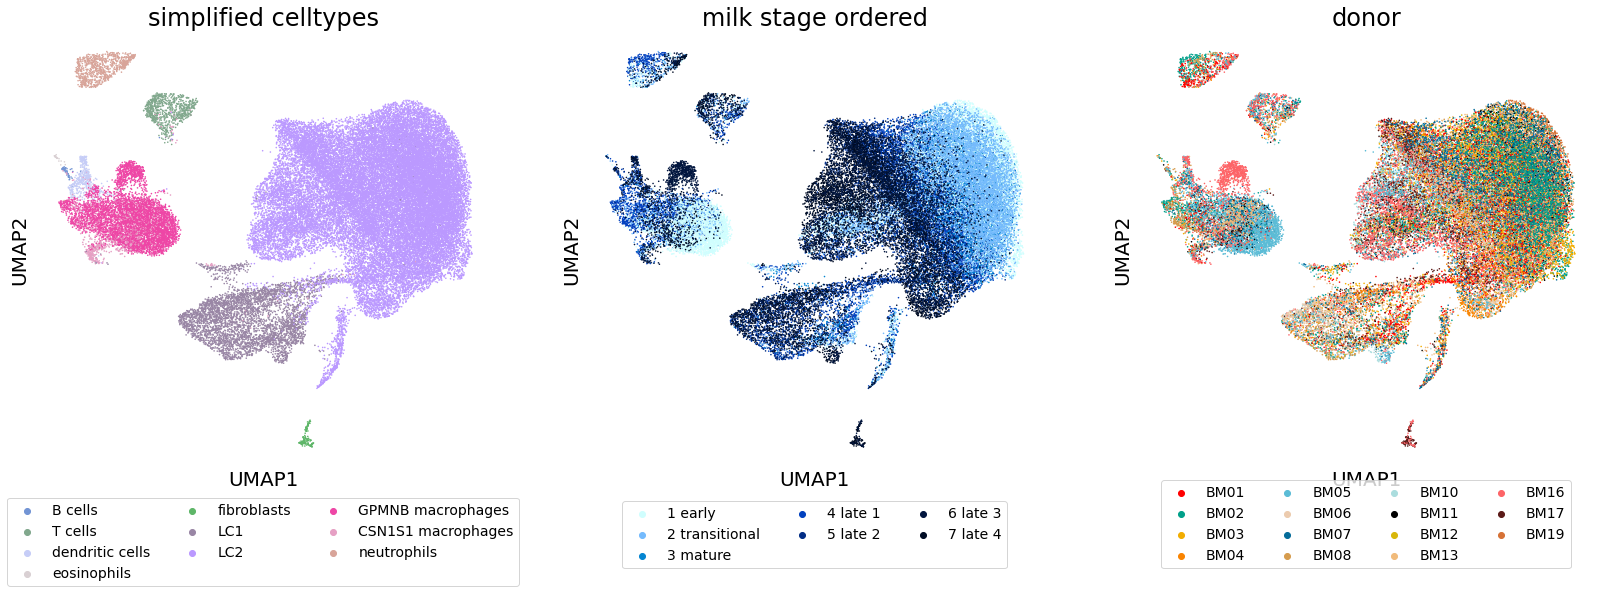

In [6]:
import matplotlib.gridspec as gridspec
import matplotlib.colors
plt.rcParams.update({'font.size': 20})
# Plot figure with subplots of different sizes
fig = plt.figure(figsize=(28,8))
# set up subplot grid
grid=gridspec.GridSpec(1,1)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec = grid[0])
#gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = grid[1], hspace = .05)
ax1 = fig.add_subplot(gs1[0, 0])

#plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=1)
sc.pl.umap(adata_no_doublets,color="simplified celltypes",size=10,show=False,ax=ax1)
ax1.legend(loc='lower center',bbox_to_anchor=(.5, -.29),ncol=3,prop={"size":14})
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax2 = fig.add_subplot(gs1[0, 1])
#plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=1)
sc.pl.umap(adata_no_doublets,color="milk stage ordered",size=10,show=False,ax=ax2)
ax2.legend(loc='lower center',bbox_to_anchor=(.5, -.25),ncol=3,prop={"size":14})
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax3 = fig.add_subplot(gs1[0, 2])
sc.pl.umap(adata_no_doublets,color='donor',size=10,show=False,ax=ax3)
ax3.legend(loc='lower center',bbox_to_anchor=(.5, -.25),ncol=4,prop={"size":14})
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax3.spines["left"].set_visible(False)

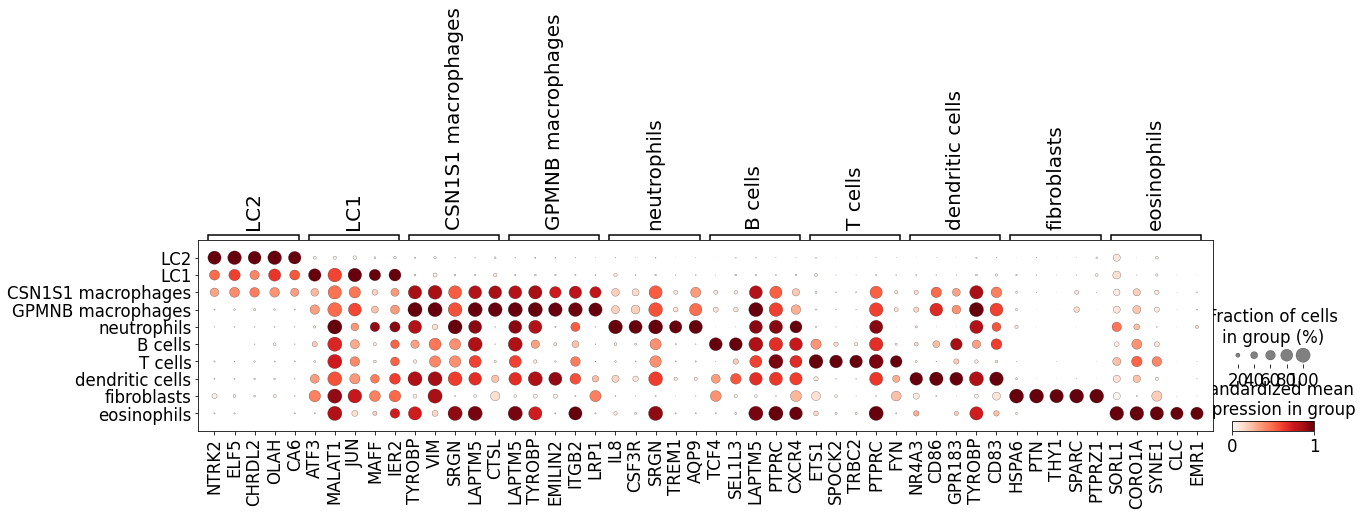

In [10]:
# Save the marker gene dotplot for Figure 1 C
# differentially expressed genes are calculated in the notebook comparative_analysis/Pseudobulk_Differential_Expression.ipynb
pseudobulk_markers_folder = "../../Results/tables/General_Celltype_Pseudobulk_Marker_Genes/"
# TODO read in the filtered_degenes object
cluster_markers = {}
filtered_degenes={}
cluster_order = ['LC2', 'LC1',  'CSN1S1 macrophages','GPMNB macrophages','neutrophils', 'B cells', 'T cells', 'dendritic cells',   'fibroblasts']
for c in cluster_order:
    filtered_degenes[c] = pd.read_csv(pseudobulk_markers_folder+"marker_genes_with_pcts/"+c.replace(" ","_").replace("/","_")+"_pseudobulk_marker_genes.csv",index_col=0)
    cluster_markers[c] = filtered_degenes[c].sort_values("pts_difference",ascending=False).head(5).index
    
cluster_markers["eosinophils"] =[ "SORL1","CORO1A","SYNE1","CLC","EMR1" ] # because of low cell numbers, this celltype was dropoped from pseudobulk analysis  
sc.pl.dotplot(adata_no_doublets,cluster_markers,groupby="simplified celltypes",categories_order = cluster_order+["eosinophils"],show=False,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')

plt.savefig(figure1_path+"/Fig1C_all_cells_pseudobulk_marker_genes.pdf",bbox_inches="tight")